In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import talib
import data
import feature_engineering

warnings.simplefilter(action='ignore', category=FutureWarning)

# Read Prices

In [2]:
df_equity = data.read_excel_sheets()
df_equity['OpenTime'] = pd.to_datetime(df_equity['OpenTime'])
df_equity = df_equity.set_index('OpenTime') 

list_equity = df_equity.Symbol.unique().tolist()
print(f"\nEquity:\n{list_equity}")

crypto = 'data_crypto.xlsx'
df_crypto = (
    pd.read_excel(crypto)
    .drop(columns=['Unnamed: 0'])
)

df_crypto['OpenTime'] = pd.to_datetime(df_crypto['OpenTime'])
df_crypto = df_crypto.set_index('OpenTime') 

list_crypto = df_crypto.Symbol.unique().tolist()
print(f"\nCrypto:\n{list_crypto}")

AAPL
MSFT
NVDA
AMZN
META
GOOGL
BRK.B
GOOG
AVGO
TSLA
SPY_ETF
DAXEX_ETF
CAC40_ETF
NKY225_ETF
DJIA_ETF
EQQQ_ETF
FTSE_ETF

Equity:
['NKY225_ETF', 'AAPL', 'AMZN', 'AVGO', 'BRK.B', 'DJIA_ETF', 'GOOG', 'GOOGL', 'META', 'MSFT', 'NVDA', 'SPY_ETF', 'TSLA', 'DAXEX_ETF', 'CAC40_ETF', 'EQQQ_ETF', 'FTSE_ETF']

Crypto:
['ADAUSDT', 'AVAXUSDT', 'BNBUSDT', 'BTCUSDT', 'DOGEUSDT', 'ETHUSDT', 'SOLUSDT', 'TRXUSDT', 'USDCUSDT', 'XRPUSDT']


**Sample Pairs**

```
Pairs: META & BNBUSDT
Correlation: 0.787

Spread ADF Statistic: -3.3381
p-value: 0.013 (Spread is stationary)

Cointegration Test Statistic: -3.6076
p-value: 0.024 (Both series are cointegrated)

In [3]:
ticker_eqt = 'META'
ticker_cpy = 'BNBUSDT'

close = data.process_pairs_series(ticker_eqt, ticker_cpy, df_equity.reset_index(), df_crypto.reset_index(), 'Close')
close

,META,BNBUSDT
OpenTime,,
2024-10-14 12:30:00,593.1400,590.50
2024-10-14 12:35:00,593.5200,590.10
2024-10-14 12:40:00,594.7200,589.30
2024-10-14 12:45:00,595.3300,588.70
2024-10-14 12:50:00,596.4400,588.30
...,...,...
2025-01-17 18:35:00,614.0775,724.02
2025-01-17 18:40:00,613.7600,724.30
2025-01-17 18:45:00,614.0500,723.72


In [4]:
config = {
    'ema': [8, 21, 55],
    'macd': {
        'fast': 12,
        'slow': 26,
        'signal': 9,
    },
    'rsi': [14],
    'bb': {
        'timeperiod': 20,
        'nbdevup': 2,
        'nbdevdn': 2,
    },
    'atr': {
        'timeperiod': 14,
    },
    'stoch': {
        'fastk_period': 14,
        'slowk_period': 3,
        'slowd_period': 3,
    },
    'cci': {
        'timeperiod': 20,
    },
    'willr': {
        'timeperiod': 14,
    },
}

ticker_eqt = 'META'
ticker_cpy = 'BNBUSDT'


feat = feature_engineering.create_features(ticker_eqt, ticker_cpy, df_equity.reset_index(), df_crypto.reset_index(), config).dropna()

In [5]:
import matplotlib.pyplot as plt

In [6]:
def plot_features(df, features, title="Feature Plot"):
    """
    Plots multiple selected features from a DataFrame.

    Parameters:
    df (pd.DataFrame): DataFrame containing the features.
    features (list): List of column names to plot.
    title (str): Title of the plot. Default is "Feature Plot".

    Returns:
    None (Displays the plot)
    """
    plt.figure(figsize=(12, 6))
    
    for feature in features:
        if feature in df.columns:
            plt.plot(df.index, df[feature], label=feature)
        else:
            print(f"Warning: Feature '{feature}' not found in DataFrame.")

    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

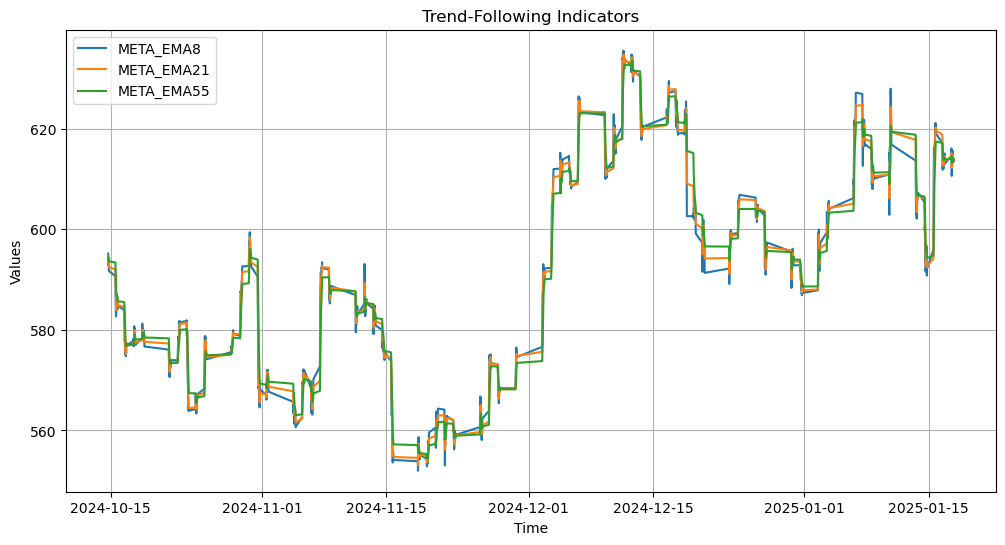

In [7]:
features = ['META_EMA8', 'META_EMA21', 'META_EMA55']
plot_features(feat, features, title='Trend-Following Indicators')

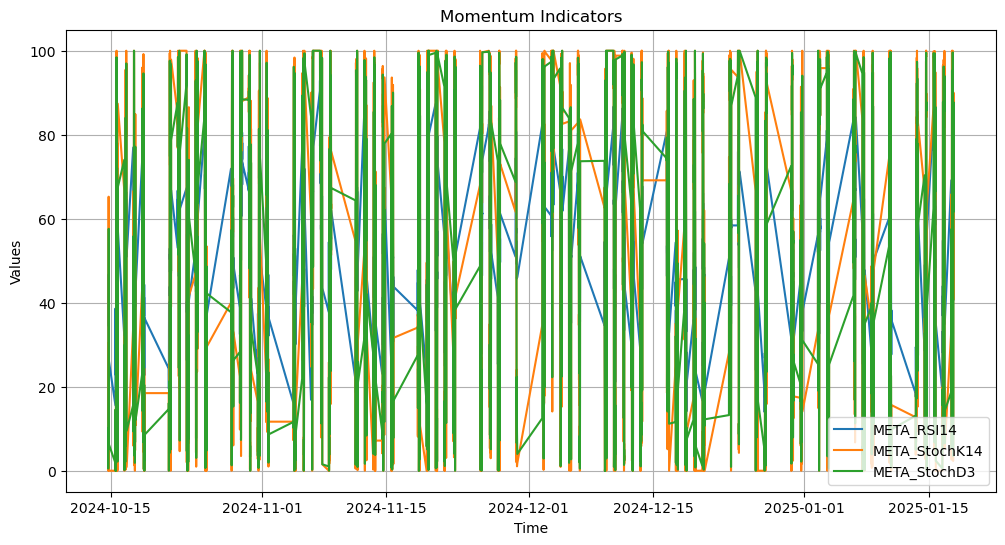

In [8]:
features = ['META_RSI14', 'META_StochK14', 'META_StochD3']
plot_features(feat, features, title='Momentum Indicators')

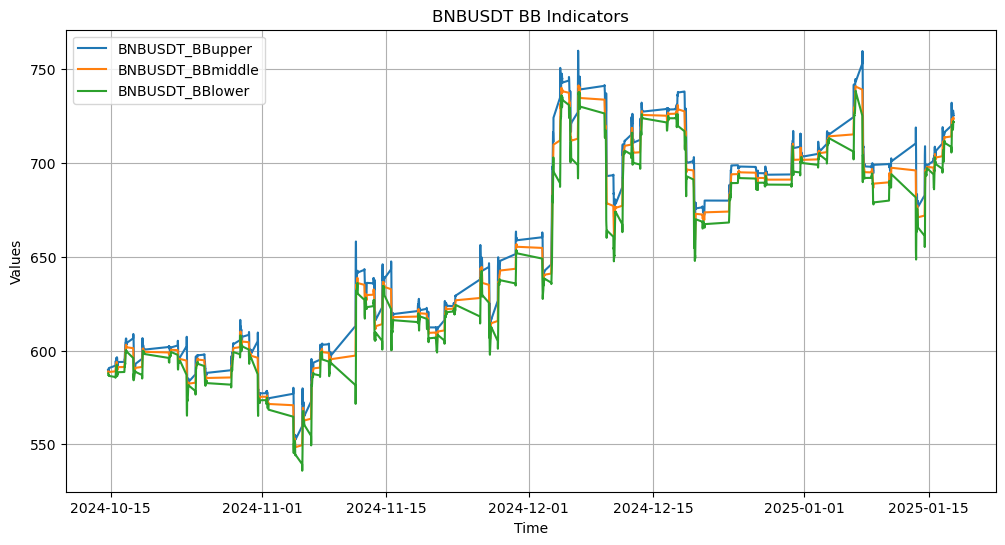

In [9]:
features = ['BNBUSDT_BBupper', 'BNBUSDT_BBmiddle', 'BNBUSDT_BBlower']
plot_features(feat, features, title='BNBUSDT BB Indicators')

## Create features

In [10]:
feat = feature_engineering.create_features(ticker_eqt, ticker_cpy, df_equity.reset_index(), df_crypto.reset_index(), config, dropna=True)
feat_norm, standard_scaler = feature_engineering.normalized_features(feat, scaler='StandardScaler')
feat_minmax, minmax_scaler = feature_engineering.normalized_features(feat, scaler='MinMax')

In [11]:
standard_scaler

StandardScaler()

In [12]:
minmax_scaler

MinMaxScaler()

In [13]:
feat_norm

,META_EMA8,META_EMA21,META_EMA55,META_MACD,META_RSI14,META_BBupper,META_BBmiddle,META_BBlower,META_ATR14,META_StochK14,...,BNBUSDT_MACD,BNBUSDT_RSI14,BNBUSDT_BBupper,BNBUSDT_BBmiddle,BNBUSDT_BBlower,BNBUSDT_ATR14,BNBUSDT_StochK14,BNBUSDT_StochD3,BNBUSDT_CCI20,BNBUSDT_WILLR14
OpenTime,,,,,,,,,,,,,,,,,,,,,
2024-10-14 17:00:00,0.135841,0.153991,0.188751,-0.253818,-0.782833,0.042878,0.159586,0.277522,-1.160468,-1.427177,...,-0.191045,-0.962094,-1.222083,-1.165183,-1.095393,-1.072011,-1.638673,-1.498173,-1.279847,-1.514329
2024-10-14 17:05:00,0.123886,0.147599,0.185147,-0.312783,-1.135607,0.046747,0.154581,0.263436,-1.114809,-1.471147,...,-0.189393,-0.596300,-1.222219,-1.165740,-1.096380,-1.065618,-1.404930,-1.613243,-0.674088,-0.866373
2024-10-14 17:10:00,0.112227,0.140816,0.181284,-0.369008,-1.264684,0.048050,0.148557,0.249944,-1.144635,-1.471147,...,-0.183526,-0.507990,-1.222838,-1.166391,-1.097057,-1.091137,-1.112750,-1.432007,-0.501392,-0.704384
2024-10-14 17:15:00,0.106803,0.136150,0.178158,-0.388434,-0.903541,0.043222,0.143055,0.243833,-1.146162,-1.319294,...,-0.190906,-0.786110,-1.223000,-1.167321,-1.098770,-1.083379,-1.054314,-1.230633,-0.901896,-1.352340
2024-10-14 17:20:00,0.097708,0.129901,0.174342,-0.427063,-1.185947,0.041756,0.137031,0.233199,-1.122459,-1.319294,...,-0.211877,-1.092628,-1.222629,-1.168808,-1.102160,-1.065689,-1.288058,-1.190359,-1.303579,-1.514329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-17 18:35:00,1.047909,1.056047,1.073924,-0.060536,0.015837,0.909399,1.046039,1.170397,-0.942006,1.028562,...,-0.032080,0.095299,1.250217,1.343667,1.427272,-0.642438,-0.206822,-0.520374,0.126222,0.235274
2025-01-17 18:40:00,1.045929,1.055158,1.073594,-0.067328,-0.198358,0.897782,1.042842,1.175942,-0.965857,0.923962,...,-0.011939,0.205394,1.248301,1.343035,1.427970,-0.679311,0.466308,-0.079329,0.403795,1.239484
2025-01-17 18:45:00,1.047366,1.055576,1.073764,-0.055241,0.006203,0.895127,1.042008,1.177000,-0.993762,0.903964,...,-0.016026,-0.064436,1.246563,1.342199,1.428071,-0.682095,0.686822,0.326402,-0.045883,0.428716


In [14]:
feat_minmax

,META_EMA8,META_EMA21,META_EMA55,META_MACD,META_RSI14,META_BBupper,META_BBmiddle,META_BBlower,META_ATR14,META_StochK14,...,BNBUSDT_MACD,BNBUSDT_RSI14,BNBUSDT_BBupper,BNBUSDT_BBmiddle,BNBUSDT_BBlower,BNBUSDT_ATR14,BNBUSDT_StochK14,BNBUSDT_StochD3,BNBUSDT_CCI20,BNBUSDT_WILLR14
OpenTime,,,,,,,,,,,,,,,,,,,,,
2024-10-14 17:00:00,0.505529,0.507969,0.515119,0.458724,0.337996,0.456422,0.507647,0.535320,0.045031,1.522843e-02,...,0.478404,0.347094,0.179796,0.209061,0.256145,0.018251,2.356633e-15,0.063492,0.393278,1.110223e-16
2024-10-14 17:05:00,0.502432,0.506285,0.514154,0.451823,0.281221,0.457395,0.506324,0.531807,0.051375,1.545430e-15,...,0.478594,0.406113,0.179760,0.208905,0.255885,0.019047,7.843137e-02,0.026144,0.446927,2.352941e-01
2024-10-14 17:10:00,0.499411,0.504498,0.513121,0.445243,0.260448,0.457723,0.504733,0.528442,0.047231,1.545430e-15,...,0.479265,0.420361,0.179596,0.208724,0.255708,0.015868,1.764706e-01,0.084967,0.462222,2.941176e-01
2024-10-14 17:15:00,0.498006,0.503269,0.512284,0.442969,0.318569,0.456509,0.503279,0.526918,0.047018,5.259259e-02,...,0.478420,0.375488,0.179553,0.208465,0.255258,0.016835,1.960784e-01,0.150327,0.426752,5.882353e-02
2024-10-14 17:20:00,0.495649,0.501622,0.511263,0.438448,0.273119,0.456140,0.501687,0.524266,0.050312,5.259259e-02,...,0.476019,0.326033,0.179651,0.208050,0.254367,0.019038,1.176471e-01,0.163399,0.391176,1.110223e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-17 18:35:00,0.741843,0.745622,0.752020,0.481344,0.466532,0.674256,0.741859,0.757996,0.075387,8.657461e-01,...,0.496608,0.517699,0.834269,0.908638,0.918779,0.071767,4.804498e-01,0.380854,0.517807,6.353383e-01
2025-01-17 18:40:00,0.741330,0.745388,0.751931,0.480549,0.432060,0.671335,0.741014,0.759379,0.072073,8.295188e-01,...,0.498915,0.535462,0.833762,0.908462,0.918963,0.067173,7.063150e-01,0.524004,0.542390,1.000000e+00
2025-01-17 18:45:00,0.741703,0.745498,0.751977,0.481964,0.464982,0.670668,0.740794,0.759643,0.068196,8.225930e-01,...,0.498447,0.491926,0.833302,0.908229,0.918989,0.066826,7.803074e-01,0.655691,0.502564,7.055838e-01
